<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#LLG:-abricate" data-toc-modified-id="LLG:-abricate-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LLG: abricate</a></span><ul class="toc-item"><li><span><a href="#Run" data-toc-modified-id="Run-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#By-marker" data-toc-modified-id="By-marker-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>By marker</a></span><ul class="toc-item"><li><span><a href="#Writing-table" data-toc-modified-id="Writing-table-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Writing table</a></span></li></ul></li><li><span><a href="#By-taxonomy" data-toc-modified-id="By-taxonomy-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>By taxonomy</a></span></li><li><span><a href="#Distribution:-env-host" data-toc-modified-id="Distribution:-env-host-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Distribution: env-host</a></span></li><li><span><a href="#Distribution:-host-clades" data-toc-modified-id="Distribution:-host-clades-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Distribution: host clades</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* run the LLG pipeline on MAGs and assess antimicrobial resistance 

# Var

In [1]:
base_dir = file.path('/ebio', 'abt3_projects', 'Georg_animal_feces', 'data',
                     'metagenome', 'multi-study', 'BioProjects', 'summary',
                     'LLMGA', 'wGeorgAnimal', 'drep-0.95')

# workdir 
work_dir = file.path(base_dir, 'LLG')

# de-rep'd MAG metadata
MAG_meta_file = file.path(base_dir, 'drep-MAG_metadata.tsv')

# params
threads = 16

# Init

In [3]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(ape)
library(data.table)
library(tidytable)
library(LeyLabRMisc)

In [4]:
df.dims()
setDTthreads(8)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/LLG 


# Load

In [5]:
MAG_meta = fread(MAG_meta_file, sep='\t') %>%
    dt_mutate(binID = gsub('_+', '.', binID),
              binID = gsub('\\.+', '.', binID))
MAG_meta

binID,fasta.x,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,⋯,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings
<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>
artificially.reared.1.metabat2.low.PE.002.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa,o__Bacteroidales (UID2657),160,491,268,92.92,3.00,28.57,3388189,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__Bacteroides_A sp900066445,85.72,0.61,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__,Placement,taxonomic classification fully defined by topology,93.33,11,0.985595897806,N/A
artificially.reared.2.maxbin2.low.prob.006.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa,k__Bacteria (UID2569),434,278,186,88.60,1.11,50.00,2174315,⋯,N/A,N/A,N/A,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Paludibacteraceae;g__;s__,Placement,taxonomic classification fully defined by topology,90.20,11,0.836955988283,N/A
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X95.Meadow.Viper.metabat2.low.PE.002.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/X95_Meadow_Viper__metabat2_low_PE.002.contigs.fa,f__Enterobacteriaceae (UID5124),134,1172,336,89.06,0.94,58.33,3738913,⋯,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter freundii,98.83,0.94,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__,ANI/Placement,topological placement and ANI have congruent species assignments,94.35,11,N/A,N/A
X96.European.Hare.metabat2.high.PE.013.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/X96_European_Hare__metabat2_high_PE.013.contigs.fa,o__Clostridiales (UID1212),172,263,149,93.83,1.45,0.00,2554075,⋯,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__UBA5446;s__UBA5446 sp002427465,76.48,0.13,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__;s__,Placement,taxonomic novelty determined using RED,94.40,11,0.918766142869,N/A


# LLG: abricate

* Running `abricate` as part of `LLG` pipeline

In [8]:
# snakemake config
config_file = file.path(work_dir, 'config_AMR.yaml')
cat_file(config_file)

# table with genome --> fasta_file information
samples_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/LLG/genomes.tsv

# output location
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/LLG/

# temporary file directory (your username will be added automatically)
tmp_dir: /ebio/abt3_scratch/

# batch processing of genomes for certain steps
## increase to better parallelize
batches: 100 

# software parameters
# Use "Skip" to skip any of these steps. If no params for rule, use ""
# dRep MAGs are not further analyzed, but you can de-rep & then use the de-rep genome table as input.
params:
  # assembly assessment
  seqkit: Skip #""
  quast: Skip #""
  multiqc_on_quast: "" 
  checkm: Skip #""
  # de-replication (requires checkm)
  drep: Skip #-comp 50 -con 5 -sa 0.95
  # taxonomy
  sourmash:
    compute: Skip #--scaled 10000 -k 31
    gath

## Run

```
screen -L -S llg-MAG95 ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/LLG/config_AMR.yaml 50
```

# Summary

In [6]:
abricate_dir = file.path(work_dir, 'AMR', 'abricate')
abr_sum_files = list_files(abricate_dir, 'hits_summary.tsv')
abr_sum_files %>% length
abr_sum_files %>% head(n=3)

[1] 1522

[1] "/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/LLG/AMR/abricate/artificially_reared_1__metabat2_low_PE.002.contigs/hits_summary.tsv" 
[2] "/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/LLG/AMR/abricate/artificially_reared_2__maxbin2_low_prob.006.contigs/hits_summary.tsv"
[3] "/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/LLG/AMR/abricate/artificially_reared_2__metabat2_high_PE.035.contigs/hits_summary.tsv"

In [7]:
read_table = function(F){
    X = basename(dirname(F))
    X = enexpr(X)
    dt = fread(F, sep='\t', check.names=TRUE) %>%
        dt_mutate(genomeID := !!X) %>%
        dt_filter(NUM_FOUND > 0) %>%
        dt_select(-X.FILE, -NUM_FOUND) %>%
        dt_pivot_longer(names_to='marker', values_to='coverage', cols=c(-genomeID))
    return(dt)
}

abr_sum = abr_sum_files %>%
    as.list %>%
    plyr::llply(read_table) %>%
    rbindlist(use.names=TRUE, fill=TRUE) %>%
    dt_mutate(genomeID = gsub('_+', '.', genomeID),
              genomeID = gsub('\\.+', '.', genomeID))

abr_sum

Warning message in dt_pivot_longer.tidytable(., names_to = "marker", values_to = "coverage", :
“No columns remaining after removing”


genomeID,marker,coverage
<chr>,<chr>,<chr>
artificially.reared.1.metabat2.low.PE.002.contigs,G2alt.BAC0490,97.29
artificially.reared.1.metabat2.low.PE.002.contigs,acrC.BAC0007,88.68;87.24
⋮,⋮,⋮
X96.European.Hare.metabat2.high.PE.013.contigs,yfeD.BAC0442,84.85
X96.European.Hare.metabat2.high.PE.013.contigs,ziaA.BAC0455,86.27


In [8]:
# number of markers per genome
x = abr_sum %>%
    dt_summarize(n_markers = n_distinct(marker),
              by = list(genomeID)) %>%
    dt_pull(n_markers) 

x %>% summary_x('markers per genome')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
markers per genome,1,23,31,34.58514,41,457,176.451,72.036


In [9]:
# joining with genome metadata
overlap(abr_sum %>% dt_pull(genomeID),
        MAG_meta %>% dt_pull(binID))      

intersect(x,y): 1521 
setdiff(x,y): 0 
setdiff(y,x): 1 
union(x,y): 1522 


In [10]:
# not found in abricate 
setdiff(MAG_meta %>% dt_pull(binID), 
        abr_sum %>% dt_pull(genomeID))

[1] "DSTMI04001.maxbin2.low.prob.005.contigs"

In [11]:
# joining
abr_sum = abr_sum %>%
    dt_inner_join(MAG_meta %>% 
                      dt_rename(genomeID = binID) %>%
                      dt_select(genomeID, Domain, Phylum, Class, Order, Family, Genus,
                                Species, Completeness, Contamination, Genome.size..bp.),
                  by=c('genomeID')) %>%
    dt_mutate_across(c(Domain, Phylum, Class, Order, Family, Genus, Species), 
                     ~gsub('^[a-z]__', '', .x))
abr_sum

genomeID,marker,coverage,Domain,Phylum,Class,Order,Family,Genus,Species,Completeness,Contamination,Genome.size..bp.
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>
artificially.reared.1.metabat2.low.PE.002.contigs,G2alt.BAC0490,97.29,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,,92.92,3,3388189
artificially.reared.1.metabat2.low.PE.002.contigs,acrC.BAC0007,88.68;87.24,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,,92.92,3,3388189
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X96.European.Hare.metabat2.high.PE.013.contigs,yfeD.BAC0442,84.85,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA5446,,93.83,1.45,2554075
X96.European.Hare.metabat2.high.PE.013.contigs,ziaA.BAC0455,86.27,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA5446,,93.83,1.45,2554075


## By marker

In [12]:
# total number of markers
df.dims(20)
abr_sum %>%
    dt_count(by=list(marker)) %>%
    arrange(-N) %>%
    dt_slice_head(20)
df.dims()

marker,N
<chr>,<int>
ruvB.BAC0355,1655
galE.BAC0755,1642
tupC.BAC0607,1538
fabL.ygaA.BAC0158,1518
arsT.BAC0714,1512
smdA.BAC0353,1480
mdeA.BAC0207,1407
pstB.BAC0316,1387
recG.BAC0356,1362


In [13]:
# mean number of markers per genome
abr_sum_s = abr_sum %>%
    dt_count(by=list(marker)) %>%
    dt_mutate(marker_rank = row_number(-N))

abr_sum_s %>% unique_n('markers', marker)
abr_sum_s %>% summary_x('mean num', N)
abr_sum_s

No. of unique markers: 1777 


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
mean num,1,7,8,52.14519,26,1655,668.224,272.801


marker,N,marker_rank
<chr>,<int>,<int>
G2alt.BAC0490,369,57
acrC.BAC0007,170,105
⋮,⋮,⋮
sdiA,8,1200
sinH,8,1201


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/43568f96379f76804b44b235ded06f36.RDS 


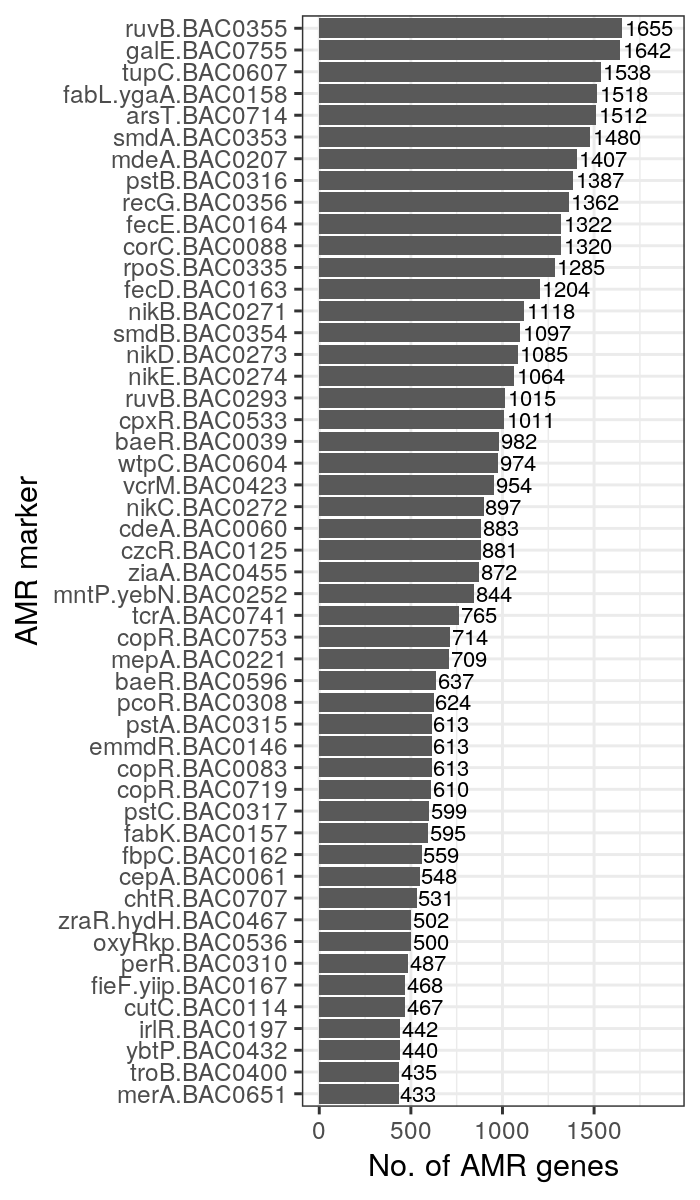

In [14]:
# plotting
p = abr_sum_s %>%
    dt_filter(marker_rank <= 50) %>%
    dt_mutate(marker = reorder(marker, N)) %>%
    ggplot(aes(marker, N)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=N), hjust=-0.05, size=2.8) +
    scale_y_continuous(limits=c(0, 1900)) +
    labs(x='AMR marker', y='No. of AMR genes') +
    theme_bw() +
    coord_flip()

p.dims(3.5,6)
Plot(p)

In [15]:
# mean number of markers per genome
abr_sum_s = abr_sum %>%
    dt_count(by=list(marker, Domain, Phylum)) %>%
    dt_mutate(marker_total_N = sum(N), by=list(marker)) %>%
    dt_mutate(phylum_total_N = sum(N), by=list(Domain, Phylum)) %>%
    dt_mutate(Phylum = ifelse(phylum_total_N < 400, 'Other', Phylum)) %>%
    dt_summarize(N = sum(N), by=list(marker, Domain, Phylum, marker_total_N, phylum_total_N))

abr_sum_s %>% unique_n('markers', marker)
abr_sum_s %>% summary_x('mean num', N)
abr_sum_s

No. of unique markers: 1777 


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
mean num,1,3,7,23.14236,17,632,253.979,103.687


marker,Domain,Phylum,marker_total_N,phylum_total_N,N
<chr>,<chr>,<chr>,<int>,<int>,<int>
G2alt.BAC0490,Bacteria,Bacteroidota,369,13680,104
acrC.BAC0007,Bacteria,Bacteroidota,170,13680,125
⋮,⋮,⋮,⋮,⋮,⋮
sinH,Bacteria,Proteobacteria,8,28279,8
smvA.emrB.BAC0367,Bacteria,Proteobacteria,18,28279,8


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/2c3ab919caa25db27a867f5af8df4be8.RDS 


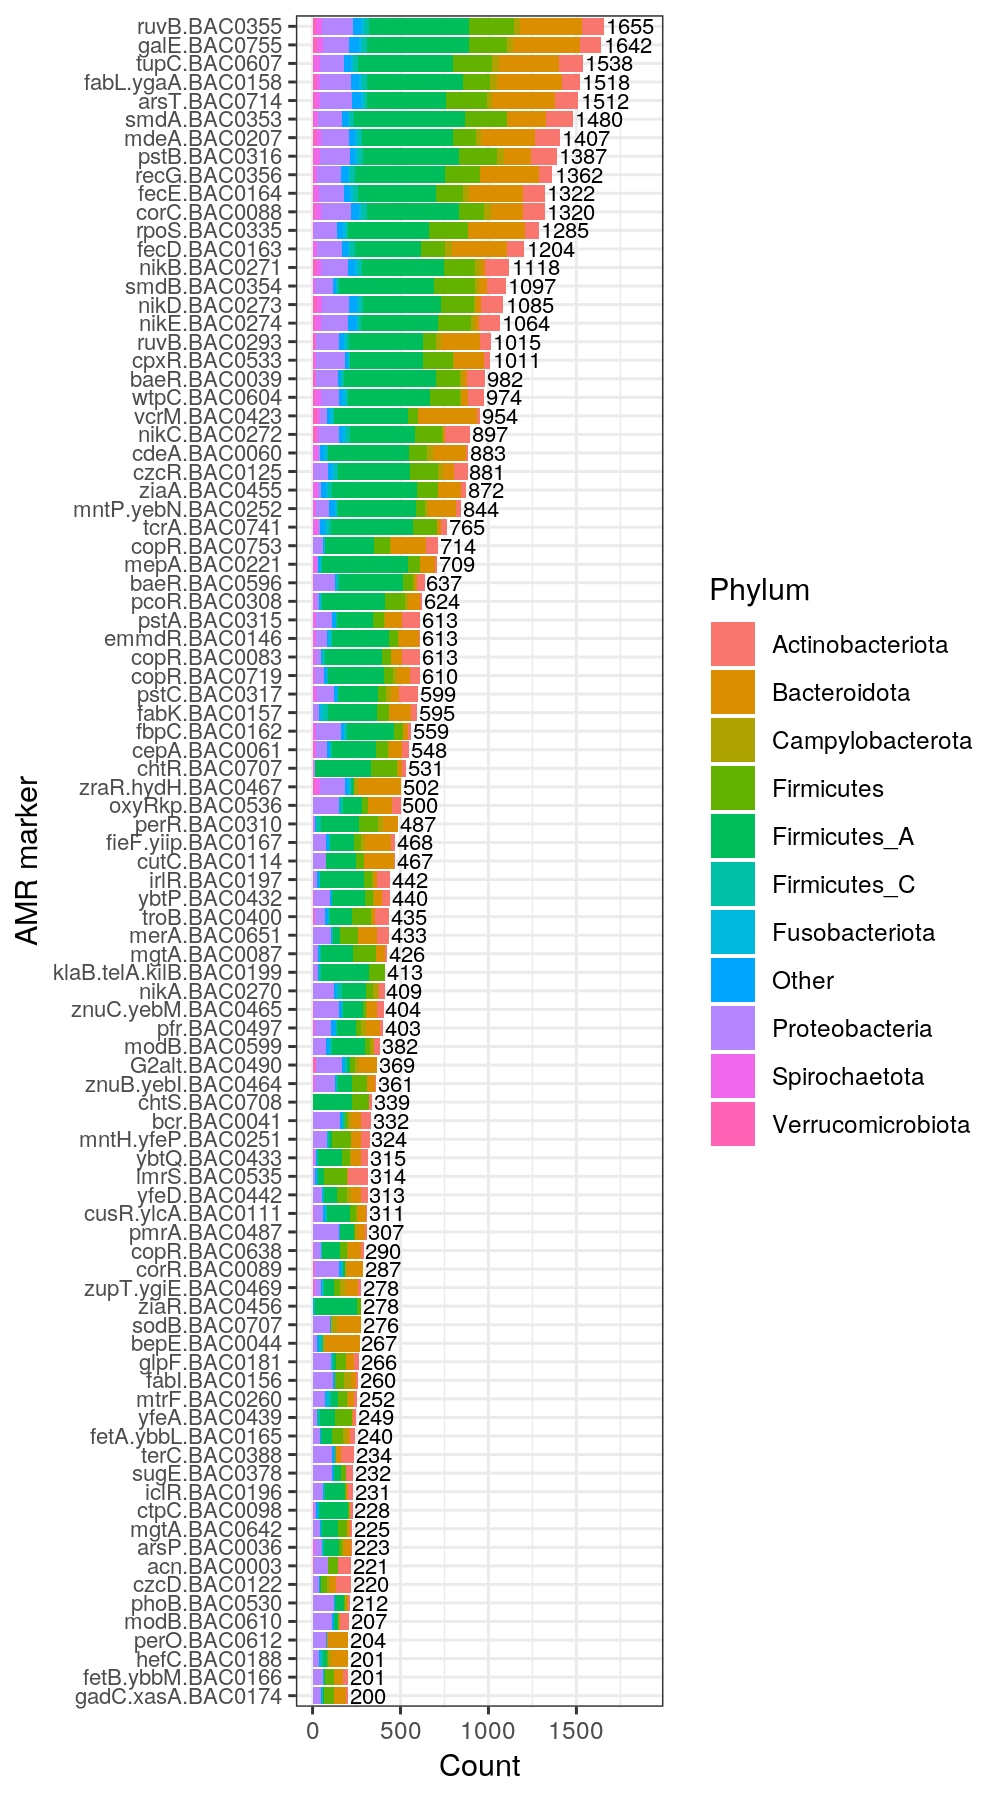

In [17]:
# plotting
tmp = abr_sum_s %>%
    dt_filter(marker_total_N >= 200) %>%
    dt_mutate(marker = reorder(marker, marker_total_N)) 

p = tmp %>%
    ggplot(aes(marker, N)) +
    geom_bar(stat='identity', aes(fill=Phylum)) +
    geom_text(data=tmp %>% dt_distinct(marker, marker_total_N),
              aes(label=marker_total_N, y=marker_total_N), 
              hjust=-0.05, size=2.8) +
    scale_y_continuous(limits=c(0, 1900)) +
    labs(x='AMR marker', y='Count') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8)
    ) +
    coord_flip()

p.dims(5,9)
Plot(p)

### Writing table

In [120]:
amr_summary_file = file.path(work_dir, 'AMR', 'Abricate_summary.tsv')
abr_sum %>%
    dt_count(by=list(marker, Domain, Phylum, Class, Order, Family, Genus)) %>%
    arrange(Domain, Phylum, Class, Order, Family, Genus) %>%
    write_table(amr_summary_file)

File written: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/LLG/AMR/Abricate_summary.tsv 


## By taxonomy

In [18]:
# total number of markers
df.dims(30)
abr_sum %>%
    dt_count(marker, 
             by=list(Domain, Phylum)) %>%
    arrange(-N) %>%
    dt_slice_head(30)
df.dims()

marker,Domain,Phylum,N
<chr>,<chr>,<chr>,<int>
smdA.BAC0353,Bacteria,Firmicutes_A,632
galE.BAC0755,Bacteria,Firmicutes_A,577
ruvB.BAC0355,Bacteria,Firmicutes_A,570
fabL.ygaA.BAC0158,Bacteria,Firmicutes_A,548
pstB.BAC0316,Bacteria,Firmicutes_A,545
tupC.BAC0607,Bacteria,Firmicutes_A,542
smdB.BAC0354,Bacteria,Firmicutes_A,541
corC.BAC0088,Bacteria,Firmicutes_A,528
baeR.BAC0039,Bacteria,Firmicutes_A,524


In [19]:
# mean number of markers per genome
abr_sum_s = abr_sum %>%
    dt_count(genomeID, 
             by=list(Domain, Phylum, Class, Order, Family, Genus,
                     Species, Completeness, Contamination, Genome.size..bp.)) %>%
    dt_summarize(mean_N = mean(N),
                 sd_N = sd(N),
                 stderr_N = sd(N) / sqrt(length(N)),
                 mean_genome_size = mean(Genome.size..bp.),
                 by=list(Domain, Phylum))

abr_sum_s

Domain,Phylum,mean_N,sd_N,stderr_N,mean_genome_size
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Bacteria,Bacteroidota,39.65217,71.78542,3.864797,2420764
Bacteria,Firmicutes,57.86772,119.29544,8.677467,1542292
⋮,⋮,⋮,⋮,⋮,⋮
Bacteria,Myxococcota,17.5,0.7071068,0.5,3070692
Bacteria,Planctomycetota,33.0,4.2426407,3.0,4175857


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/db3fe613eb79546a72a477c1ae577225.RDS 


Warning message:
“Removed 4 rows containing missing values (geom_linerange).”


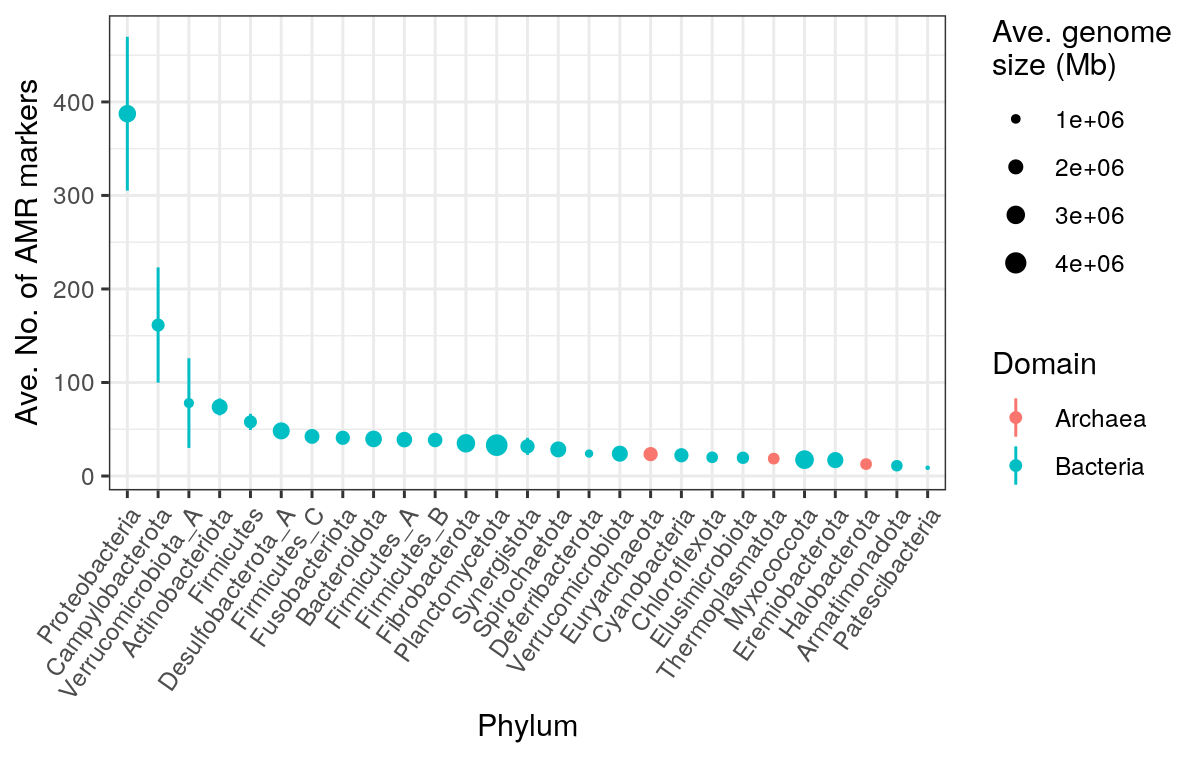

In [25]:
# plotting
p = abr_sum_s %>%
    dt_mutate(Phylum = reorder(Phylum, -mean_N)) %>%
    ggplot(aes(Phylum, mean_N, color=Domain)) +
    geom_linerange(aes(ymin=ifelse(mean_N-stderr_N < 0, 0, mean_N-stderr_N),
                       ymax=mean_N+stderr_N)) +
    geom_point(aes(size=mean_genome_size)) +
    scale_size_continuous('Ave. genome\nsize (Mb)', range=c(0.1, 3)) +
    labs(y='Ave. No. of AMR markers') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )

p.dims(6,3.8)
Plot(p)

In [26]:
# top
df.dims(10)
abr_sum_s %>% 
    dt_arrange(-mean_N) %>%
    dt_slice_head(10)
df.dims()

Domain,Phylum,mean_N,sd_N,stderr_N,mean_genome_size
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Bacteria,Proteobacteria,387.38356,702.50749,82.222282,2678833
Bacteria,Campylobacterota,161.40000,275.84977,61.681883,1549874
Bacteria,Verrucomicrobiota_A,78.00000,67.88225,48.000000,1053654
Bacteria,Actinobacteriota,73.88421,88.52778,9.082758,2230910
Bacteria,Firmicutes,57.86772,119.29544,8.677467,1542292
Bacteria,Desulfobacterota_A,48.25000,17.55603,6.206995,2539980
Bacteria,Firmicutes_C,42.34483,14.07956,2.614509,1962070
Bacteria,Fusobacteriota,40.88235,19.50283,4.730131,1800849
Bacteria,Bacteroidota,39.65217,71.78542,3.864797,2420764


In [27]:
# mean number of markers per genome (proteobacteria)
abr_sum_s = abr_sum %>%
    dt_filter(Phylum == 'Proteobacteria') %>%
    dt_count(genomeID, 
             by=list(Class, Order, Family, Genus, Species, 
                     Completeness, Contamination, Genome.size..bp.)) %>%
    dt_summarize(mean_N = mean(N),
                 sd_N = sd(N),
                 stderr_N = sd(N) / sqrt(length(N)),
                 mean_genome_size = mean(Genome.size..bp.),
                 by=list(Class, Order, Family, Genus))

abr_sum_s

Class,Order,Family,Genus,mean_N,sd_N,stderr_N,mean_genome_size
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Gammaproteobacteria,Burkholderiales,Burkholderiaceae,Parasutterella,53,NA,NA,2028815
Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Tatumella,660,NA,NA,3889370
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,3656,NA,NA,6229759
Gammaproteobacteria,Diplorickettsiales,Diplorickettsiaceae,,32,NA,NA,1763084


In [28]:
# total number of markers
df.dims(30)
abr_sum_s %>%
    arrange(-mean_N) %>%
    dt_slice_head(30)
df.dims()

Class,Order,Family,Genus,mean_N,sd_N,stderr_N,mean_genome_size
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,3656.0000,NA,NA,6229759
Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,2299.5000,381.13056,269.50000,4288505
Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Klebsiella_B,2296.0000,NA,NA,4997512
Gammaproteobacteria,Enterobacterales,Aeromonadaceae,Aeromonas,1722.0000,NA,NA,4170499
Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Proteus,1640.0000,NA,NA,5448706
Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Citrobacter,1561.0000,326.68333,231.00000,3299296
Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Morganella,1127.0000,NA,NA,3679849
Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas_E,836.0000,922.06724,652.00000,3924914
Gammaproteobacteria,Enterobacterales,Vibrionaceae,Aliivibrio,702.0000,NA,NA,3874357


In [29]:
# number of genomes 
abr_sum %>%
    dt_filter(Family == 'Pseudomonadaceae') %>%
    dt_count(genomeID, by=list(Genus))

genomeID,Genus,N
<chr>,<chr>,<int>
DSTFI04002.maxbin2.high.prob.004.contigs,Pseudomonas_E,1488
X137.Gaur.metabat2.high.PE.003.contigs,Pseudomonas_E,184
X44.Meadow.Viper.maxbin2.low.prob.001.contigs,Pseudomonas,3656


## Distribution: env-host

In [30]:
# Reading in DESeq2 data
MGnify_ku_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/MGnify-host-env_krkunq_DEseq2.tsv'
MGnify_ku = fread(MGnify_ku_file, sep='\t') %>%
    dt_mutate(taxName = gsub('_+', '.', taxName),
              taxName = gsub('\\.+', '.', taxName)) %>%
    dt_select(taxName, baseMean, log2FoldChange, lfcSE, stat, pvalue, padj) %>%
    dt_mutate(sig = padj < 0.01,
              biome = ifelse(log2FoldChange > 0, 'Host\nenriched', 'Env.\nenriched'))
MGnify_ku

taxName,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,sig,biome
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>
artificially.reared.1.metabat2.low.PE.002.contigs,49.60400,27.18591,0.8782313,30.95529,2.156289e-210,1.164878e-209,TRUE,Host enriched
artificially.reared.2.metabat2.high.PE.035.contigs,67.42143,25.09277,0.7435048,33.74931,1.094315e-249,7.897033e-249,TRUE,Host enriched
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X95.Meadow.Viper.metabat2.low.PE.002.contigs,78.54968,4.943753,1.403166,3.523285,4.262325e-04,4.408201e-04,TRUE,Host enriched
X96.European.Hare.metabat2.high.PE.013.contigs,29.89693,26.791073,1.000030,26.790268,4.195398e-158,1.211030e-157,TRUE,Host enriched


In [31]:
# key overlap
overlap(abr_sum %>% dt_pull(genomeID),
        MGnify_ku %>% dt_pull(taxName))

intersect(x,y): 966 
setdiff(x,y): 555 
setdiff(y,x): 1 
union(x,y): 1522 


In [32]:
# missing in abricate
setdiff(MGnify_ku %>% dt_pull(taxName),
        abr_sum %>% dt_pull(genomeID))

[1] "DSTMI04001.maxbin2.low.prob.005.contigs"

In [33]:
# joining
abr_sum_j = abr_sum %>%
    dt_inner_join(MGnify_ku %>% dt_rename(genomeID = taxName),
                  by=c('genomeID'))

abr_sum_j 

genomeID,marker,coverage,Domain,Phylum,Class,Order,Family,Genus,Species,⋯,Contamination,Genome.size..bp.,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,sig,biome
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>
artificially.reared.1.metabat2.low.PE.002.contigs,G2alt.BAC0490,97.29,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,,⋯,3,3388189,49.604,27.18591,0.8782313,30.95529,2.156289e-210,1.164878e-209,TRUE,Host enriched
artificially.reared.1.metabat2.low.PE.002.contigs,acrC.BAC0007,88.68;87.24,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,,⋯,3,3388189,49.604,27.18591,0.8782313,30.95529,2.156289e-210,1.164878e-209,TRUE,Host enriched
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X96.European.Hare.metabat2.high.PE.013.contigs,yfeD.BAC0442,84.85,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA5446,,⋯,1.45,2554075,29.89693,26.79107,1.00003,26.79027,4.195398e-158,1.21103e-157,TRUE,Host enriched
X96.European.Hare.metabat2.high.PE.013.contigs,ziaA.BAC0455,86.27,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA5446,,⋯,1.45,2554075,29.89693,26.79107,1.00003,26.79027,4.195398e-158,1.21103e-157,TRUE,Host enriched


In [34]:
# mean number of markers per genome & 
abr_sum_j_s = abr_sum_j %>%
    dt_count(genomeID, 
             by=list(sig, biome, Domain, Phylum, Class, Order, Family, Genus,
                     Species, Completeness, Contamination, Genome.size..bp.)) %>%
    dt_summarize(mean_N = mean(N),
                 sd_N = sd(N),
                 stderr_N = sd(N) / sqrt(length(N)),
                 mean_genome_size = mean(Genome.size..bp.),
                 by=list(sig, biome, Domain, Phylum))

abr_sum_j_s

sig,biome,Domain,Phylum,mean_N,sd_N,stderr_N,mean_genome_size
<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TRUE,Host enriched,Bacteria,Bacteroidota,47.31336,89.20582,6.055686,2600235
TRUE,Host enriched,Bacteria,Firmicutes,72.45714,146.18843,14.266530,1525145
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
TRUE,Host enriched,Bacteria,Planctomycetota,30,NA,NA,3931233
TRUE,Host enriched,Bacteria,Fusobacteriota,33,2.828427,2,1571644


Warning message:
“Removed 5 rows containing missing values (geom_linerange).”


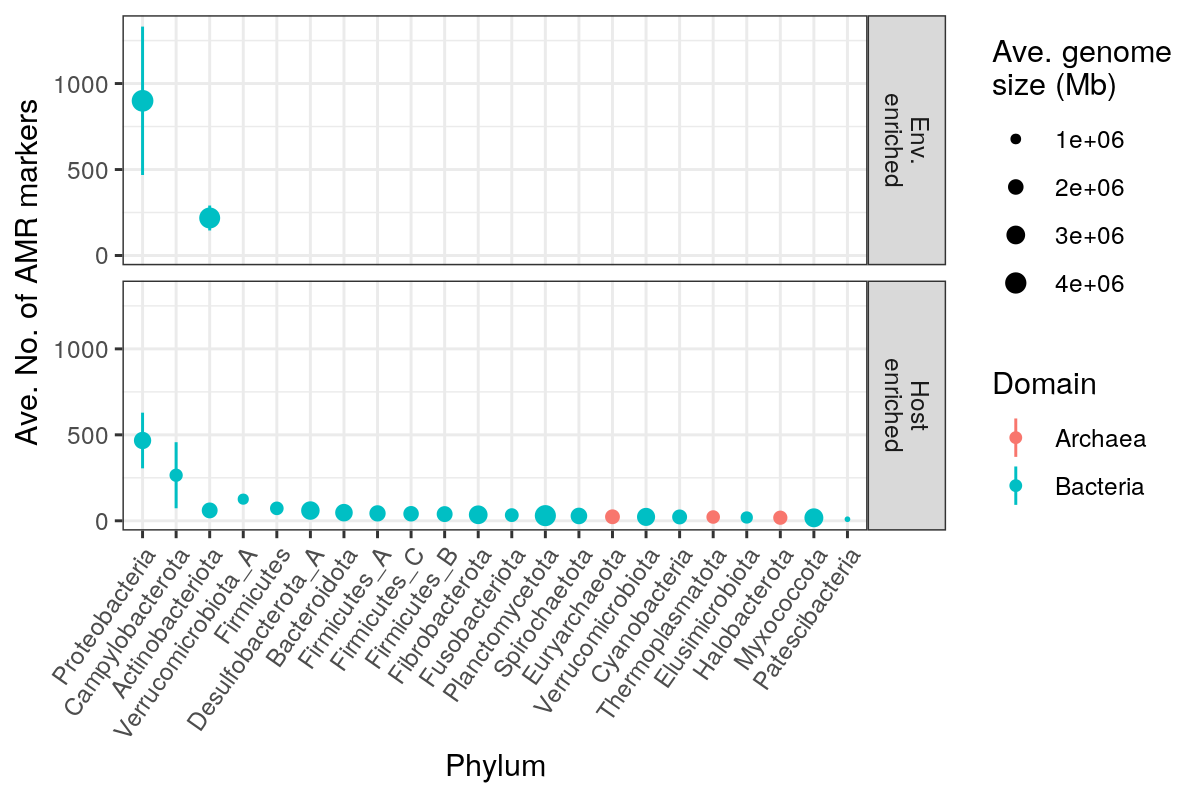

In [35]:
# plotting
p = abr_sum_j_s %>%
    filter(sig == TRUE) %>%
    dt_mutate(Phylum = reorder(Phylum, -mean_N)) %>%
    ggplot(aes(Phylum, mean_N, color=Domain)) +
    geom_linerange(aes(ymin=ifelse(mean_N-stderr_N < 0, 0, mean_N-stderr_N),
                       ymax=mean_N+stderr_N)) +
    geom_point(aes(size=mean_genome_size)) +
    scale_size_continuous('Ave. genome\nsize (Mb)', range=c(0.3, 3)) +
    labs(y='Ave. No. of AMR markers') +
    facet_grid(biome ~ .) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )

p.dims(6,4)
plot(p)

## Distribution: host clades

In [36]:
# reading in DESeq2 data
multiHost_ku_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/Georg-animal/G-animal_krkunq_DEseq2.tsv'
multiHost_ku = read.delim(multiHost_ku_file, sep='\t') %>%
    dt_mutate(taxName = gsub('_+', '.', taxName),
           taxName = gsub('\\.+', '.', taxName)) %>%
    dt_select(taxName, baseMean, log2FoldChange, lfcSE, stat, pvalue, padj) %>%
    dt_mutate(sig = padj < 0.01,
              biome = ifelse(log2FoldChange > 0, 'Mammalia\nenriched', 'Non-Mammalia\nenriched'))
multiHost_ku

taxName,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,sig,biome
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>
artificially.reared.1.metabat2.low.PE.002.contigs,35.55642,0.8149009,1.601784,0.5087458,0.6109304,0.6501555,FALSE,Mammalia enriched
artificially.reared.2.metabat2.high.PE.035.contigs,69.43168,-0.7494528,1.592633,-0.4705747,0.6379445,0.6745729,FALSE,Non-Mammalia enriched
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X95.Meadow.Viper.metabat2.low.PE.002.contigs,2818.2834,-3.838404,1.071782,-3.5813278,0.0003418525,0.000682606,TRUE,Non-Mammalia enriched
X96.European.Hare.metabat2.high.PE.013.contigs,205.4676,1.957347,2.012839,0.9724307,0.3308363133,0.384140938,FALSE,Mammalia enriched


In [37]:
# key overlap
overlap(abr_sum %>% dt_pull(genomeID),
        multiHost_ku %>% dt_pull(taxName))

intersect(x,y): 662 
setdiff(x,y): 859 
setdiff(y,x): 1 
union(x,y): 1522 


In [38]:
# joining
abr_sum_j = abr_sum %>%
    dt_inner_join(multiHost_ku %>% dt_rename(genomeID = taxName),
                  by=c('genomeID'))

abr_sum_j 

genomeID,marker,coverage,Domain,Phylum,Class,Order,Family,Genus,Species,⋯,Contamination,Genome.size..bp.,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,sig,biome
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>
artificially.reared.1.metabat2.low.PE.002.contigs,G2alt.BAC0490,97.29,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,,⋯,3,3388189,35.55642,0.8149009,1.601784,0.5087458,0.6109304,0.6501555,FALSE,Mammalia enriched
artificially.reared.1.metabat2.low.PE.002.contigs,acrC.BAC0007,88.68;87.24,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,,⋯,3,3388189,35.55642,0.8149009,1.601784,0.5087458,0.6109304,0.6501555,FALSE,Mammalia enriched
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X96.European.Hare.metabat2.high.PE.013.contigs,yfeD.BAC0442,84.85,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA5446,,⋯,1.45,2554075,205.4676,1.957347,2.012839,0.9724307,0.3308363,0.3841409,FALSE,Mammalia enriched
X96.European.Hare.metabat2.high.PE.013.contigs,ziaA.BAC0455,86.27,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA5446,,⋯,1.45,2554075,205.4676,1.957347,2.012839,0.9724307,0.3308363,0.3841409,FALSE,Mammalia enriched


In [39]:
# mean number of markers per genome & 
abr_sum_j_s = abr_sum_j %>%
    dt_count(genomeID, 
             by=list(sig, biome, Domain, Phylum, Class, Order, Family, Genus,
                     Species, Completeness, Contamination, Genome.size..bp.)) %>%
    dt_summarize(mean_N = mean(N),
                 sd_N = sd(N),
                 stderr_N = sd(N) / sqrt(length(N)),
                 mean_genome_size = mean(Genome.size..bp.),
                 by=list(sig, biome, Domain, Phylum))

abr_sum_j_s

sig,biome,Domain,Phylum,mean_N,sd_N,stderr_N,mean_genome_size
<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,Mammalia enriched,Bacteria,Bacteroidota,82.52727,148.1346,19.97446,2957947
FALSE,Non-Mammalia enriched,Bacteria,Bacteroidota,125.20000,192.2374,85.97116,2942709
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
TRUE,Non-Mammalia enriched,Bacteria,Fusobacteriota,40,NA,NA,1461395
TRUE,Non-Mammalia enriched,Bacteria,Campylobacterota,80,NA,NA,1925873


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/dc7e959246c592fd6c11b2032e4991d4.RDS 


Warning message:
“Removed 8 rows containing missing values (geom_linerange).”


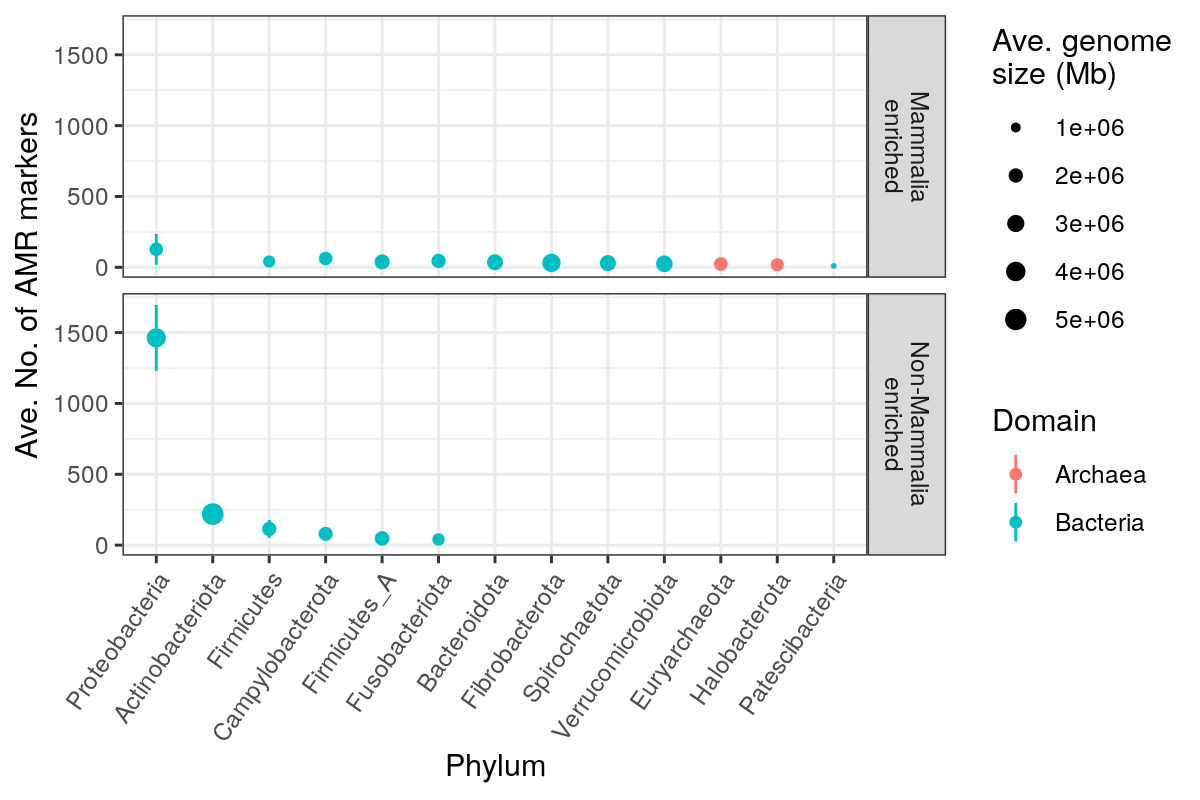

In [41]:
# plotting
p = abr_sum_j_s %>%
    filter(sig == TRUE) %>%
    dt_mutate(Phylum = reorder(Phylum, -mean_N)) %>%
    ggplot(aes(Phylum, mean_N, color=Domain)) +
    geom_linerange(aes(ymin=ifelse(mean_N-stderr_N < 0, 0, mean_N-stderr_N),
                       ymax=mean_N+stderr_N)) +
    geom_point(aes(size=mean_genome_size)) +
    scale_size_continuous('Ave. genome\nsize (Mb)', range=c(0.3, 3)) +
    labs(y='Ave. No. of AMR markers') +
    facet_grid(biome ~ .) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )

p.dims(6,4)
Plot(p)

# sessionInfo

In [201]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq/lib/libopenblasp-r0.3.7.so

Random number generation:
 RNG:     Mersenne-Twister 
 Normal:  Inversion 
 Sample:  Rounding 
 
locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] data.table_1.12.8 LeyLabRMisc_0.1.1 tidytable_0.3.2   ape_5.3          
[5] ggplot2_3.2.1     tidyr_1.0.0       dplyr_0.8.3      

loaded via a namespace (and not attached):
 [1] Rcp